In [63]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,silhouette_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## ===================== Question 1 =======================


### 1. Loading the file


In [64]:
try:
    data = pd.read_csv('Mall_Customers.csv')    
    print('Data loaded successfully.')
    print(data.head())
except FileNotFoundError:
    print('File not found')

Data loaded successfully.
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### 2. Checking for Null values


In [65]:
# checking for null values
Errors = data.isnull().sum()
Errors

#since there are no Nan values in our dataset , now we will check for any negative values(outliers)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 3. Checking for negative numbers in numeric values


In [66]:
numerics = data[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']] # this will store the numerics as a new dataframe -> [[]]
 
outliers = numerics[numerics<0]

outliers.sum()
#since there are not any negative numbers in these col so we will now check for duplicates

CustomerID                0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

### 4. Checking for duplicates


In [67]:
duplicates = data[data.duplicated()] #checking if two rows are the exact same with duplicated function
duplicates.sum()
#since there are no duplicates values here we will now proceed to the next step

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: object

### 4. Normalizing and strandilizing(MinMax)


In [68]:
scale = StandardScaler() #setting our scale to set the scale boundries for the data

#now seperating the features and labels
X = data[['Age','Annual Income (k$)']]
y = data['Spending Score (1-100)'] #store the spending score in the y (label)

Xnew = scale.fit_transform(X)

#now that we are done with the normalization we will now continue applying kmean clustering 

### 5. Applying Kmeans


In [69]:
kmean = KMeans(3)

X_train,X_test,y_train,y_test = train_test_split(Xnew,y,test_size = 0.2,random_state=42)

kmean.fit(X_train)

predictions = kmean.predict(X_test)

clusters = kmean.cluster_centers_
print(f"Cluster : {clusters}")
labels = kmean.labels_
print(f"labels : {labels}")

Cluster : [[ 1.18882198 -0.30656533]
 [-0.35178052  1.03947201]
 [-0.85482915 -0.89304001]]
labels : [0 1 2 0 1 1 2 2 1 0 2 1 2 1 0 0 0 0 1 0 1 2 2 0 2 0 0 1 0 1 2 1 1 2 0 2 0
 1 2 2 2 0 0 1 1 0 1 2 1 2 0 1 0 2 2 1 1 2 2 1 2 0 1 1 0 1 0 0 1 0 1 2 1 1
 0 1 0 0 1 2 0 0 1 1 2 2 1 1 2 2 1 2 2 1 2 1 2 2 0 1 1 0 1 2 0 0 2 0 2 0 0
 1 0 0 2 0 1 1 2 0 1 1 1 1 0 0 0 0 1 2 2 2 2 0 0 1 1 2 1 1 2 2 1 0 1 2 2 0
 2 0 1 1 2 1 0 0 2 0 1 0]


### 6. Visualizations usign scatter plot and pair plot


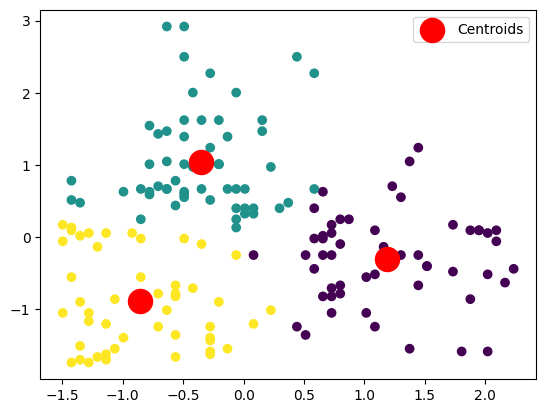

In [70]:
plt.scatter(X_train[:,0],X_train[:,1],c = labels,cmap = 'viridis') #to show the scatter plot of data

plt.scatter(clusters[:,0],clusters[:,1],s=300,c = 'red',marker = 'o',label = 'Centroids') #to show the clusters centers

plt.legend() #shows the legends at the side
plt.show() #displays the figure


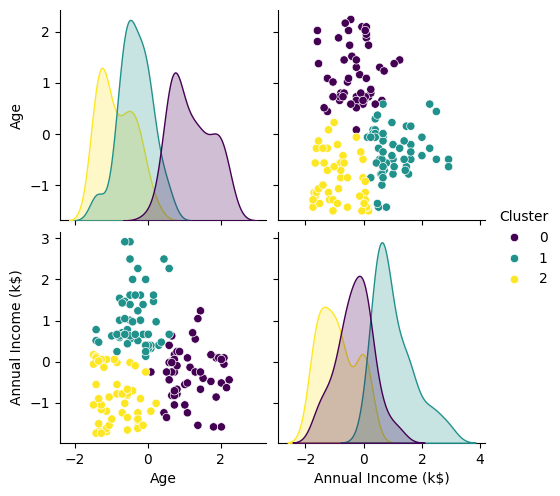

In [71]:
trainDF=pd.DataFrame(X_train,columns=X.columns) #converting Xtrain data to df form array

trainDF['Cluster'] = kmean.labels_ #getting the labels

sns.pairplot(trainDF,hue='Cluster',palette='viridis') #pairploting the labels

## ===================== Question 2 =======================


### 1. Applying elbow method and showing silhouette score for each k


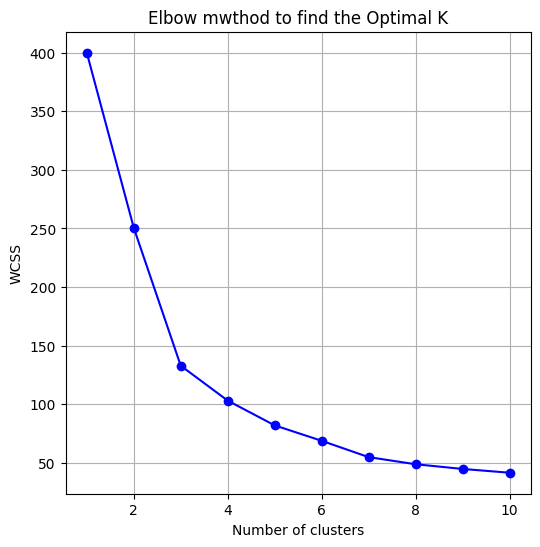

silhouette score for k(2) : 0.3706886243538429
silhouette score for k(3) : 0.4437863926928188
silhouette score for k(4) : 0.40629262670848587
silhouette score for k(5) : 0.39886420102674996
silhouette score for k(6) : 0.3795567096317829
silhouette score for k(7) : 0.39816552443194975
silhouette score for k(8) : 0.39564277767024336
silhouette score for k(9) : 0.4070684612364235
silhouette score for k(10) : 0.3873433058045521
Optimal score : 0.4437863926928188 at index : 2 for k : 3


In [72]:
#within cluster sum of squares(WCSS) using inertia_
wcss = [] 
sil_score = []

for k in range(1,11):
    kmean = KMeans(n_clusters=k, init = 'k-means++',random_state = 42)
    kmean.fit(Xnew)
    wcss.append(kmean.inertia_)
    if k>1:
        sil_sc = silhouette_score(Xnew,kmean.labels_)
        sil_score.append(sil_sc)
    else:
        None
    
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='-',color='blue')
plt.title('Elbow mwthod to find the Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
for k in range(2,11):
    print(f"silhouette score for k({k}) : {sil_score[k-2]}")

print(f"Optimal score : {max(sil_score)} at index : {sil_score.index(max(sil_score))+1} for k : {sil_score.index(max(sil_score))+2}")
#as we can see that k=3 has a high silhouette score so we will now use 3 clusters and rerun the whole process again in question 1